In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import io

In [5]:
## CLUSTERING METHOD FROM EXERCISE 2
# --- KMeans Class ---
class KMeansCustom:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def initialize_centroids(self, data):
        n_samples = data.shape[0]
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = data[indices]

    def assign_clusters(self, data):
        """
        Assign each point to the nearest centroid.
        """

        distances = np.zeros((data.shape[0], self.n_clusters))
        for c in range(self.n_clusters): 
            distances[:, c] = np.linalg.norm(data - self.centroids[c], axis=1)
        labels = np.argmin(distances, axis=1)

        return labels

    def update_centroids(self, data, labels):
        """
        Update centroids as the mean of all points assigned to each cluster.
        """
        new_centroids = np.zeros((self.n_clusters, data.shape[1]))
        for c in range(self.n_clusters):
            new_centroids[c,:] = np.mean(data[labels==c])
        return new_centroids

    def fit(self, data, iterations_to_store=[0, 1, 2, 5, 10, 20]):
        self.initialize_centroids(data)
        self.stored_params = {}
        for i in range(max(iterations_to_store) + 1):
            labels = self.assign_clusters(data)
            new_centroids = self.update_centroids(data, labels)
            if i in iterations_to_store:
                self.stored_params[i] = {
                    "centroids": self.centroids.copy(),
                    "labels": labels.copy(),
                }
            self.centroids = new_centroids

    def predict(self, data):
        return self.assign_clusters(data)

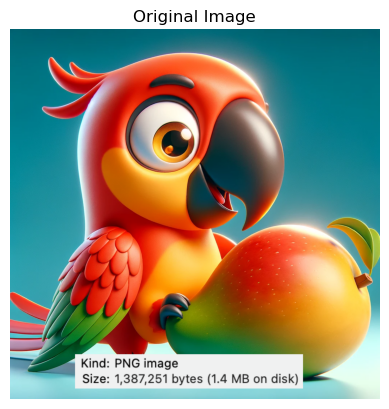

In [6]:
# Load the color image
image_path = "Macaw.webp" 
image = io.imread(image_path)
# Display the image
plt.imshow(image) 
plt.title("Original Image") 
plt.axis("off")
plt.show()

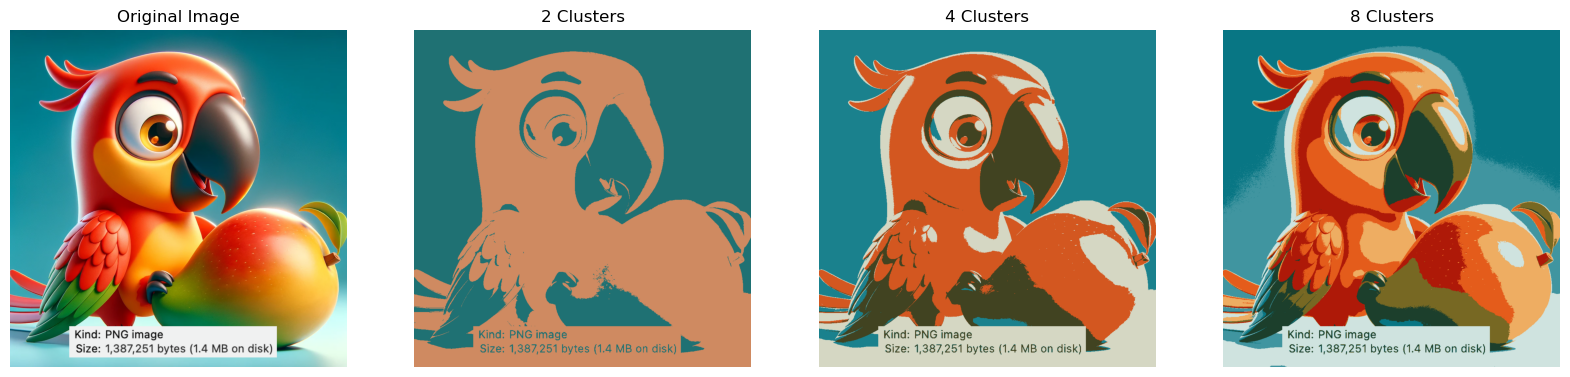

In [ ]:
import sklearn.cluster as cluster


def cluster_image(image, n_clusters,cluster_method=cluster.KMeans):
    image_flatten = image.reshape(-1,3)
    image_clustering = cluster_method(n_clusters=n_clusters).fit(image_flatten)
    centroids = image_clustering.cluster_centers_
    color_labels = image_clustering.labels_
    clustered_image_flatten = centroids[color_labels]
    clustered_image = clustered_image_flatten.reshape(image.shape).astype(np.uint8)
    return clustered_image


def subplot_clustered_images(image, n_clusters_list, cluster_method=cluster.KMeans):
    fig, axes = plt.subplots(1, len(n_clusters_list) + 1, figsize=(20, 5))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    for i, k in enumerate(n_clusters_list):
        clustered_image = cluster_image(image, k)
        axes[i + 1].imshow(clustered_image)
        axes[i + 1].set_title(f'{k} Clusters')
        axes[i + 1].axis('off')

    plt.show()

n_clusters_list = [2, 4, 8]
subplot_clustered_images(image, n_clusters_list, cluster_method=KMeansCustom)
#subplot_clustered_images(image, n_clusters_list, cluster_method=cluster.KMeans)